In [1]:
import numpy as np
import pandas as pd
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
path = '/content/drive/MyDrive/Out/dados/data_final.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
0,0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,0.0,0.0,0.0,3.85,11.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,1.0,0.0,0.0,0.0,6.96,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3.0,1.0,0.0,0.0,0.0,5.41,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4.0,1.0,0.0,0.0,0.0,1.05,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data = data.drop(columns=['Unnamed: 0'])
# Excluir a linha com índice 0
data = data.drop(0).reset_index(drop=True)

data.head()

,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
0,1.0,1.0,0.0,0.0,0.0,3.85,11.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,0.0,0.0,6.96,9.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,0.0,0.0,0.0,5.41,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,0.0,0.0,0.0,1.05,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,0.0,0.0,0.0,1.70,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data = data.tail(10000).reset_index(drop=True)

In [16]:
data.describe()

,Rodada,level,apostar,acerto,contagem,odd,odd_entrada,odd_saida,media5,media10,media20,media40,media80,media160,media320,media640
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,194999.50000,27.510200,0.021900,0.027700,6.672500,8.673733,6.228300,6.228300,6.22722,6.226180,6.224925,6.224045,6.22276,6.220878,6.217064,6.215558
std,2886.89568,0.830521,0.146364,0.196307,4.408558,111.515217,3.010961,3.010961,1.34728,0.954663,0.674909,0.471317,0.33634,0.227669,0.149904,0.096473
min,190000.00000,26.000000,0.000000,0.000000,-8.000000,0.000000,1.000000,1.000000,1.60000,3.000000,3.750000,4.550000,5.12500,5.406250,5.728125,5.950000
25%,192499.75000,27.000000,0.000000,0.000000,3.000000,1.320000,4.000000,4.000000,5.40000,5.600000,5.750000,5.900000,5.98750,6.062500,6.118750,6.143750
50%,194999.50000,27.000000,0.000000,0.000000,8.000000,1.960000,6.000000,6.000000,6.20000,6.200000,6.250000,6.250000,6.23750,6.243750,6.234375,6.218750
75%,197499.25000,28.000000,0.000000,0.000000,10.000000,3.790000,9.000000,9.000000,7.20000,6.900000,6.700000,6.550000,6.47500,6.387500,6.325000,6.279687
max,199999.00000,29.000000,1.000000,2.000000,14.000000,7160.820000,11.000000,11.000000,10.60000,10.000000,8.750000,7.775000,7.33750,6.775000,6.578125,6.478125


Precisão: 0.5385
Acurácia Direcional: 0.9895
Acurácia Direcional Ponderada: 1.528


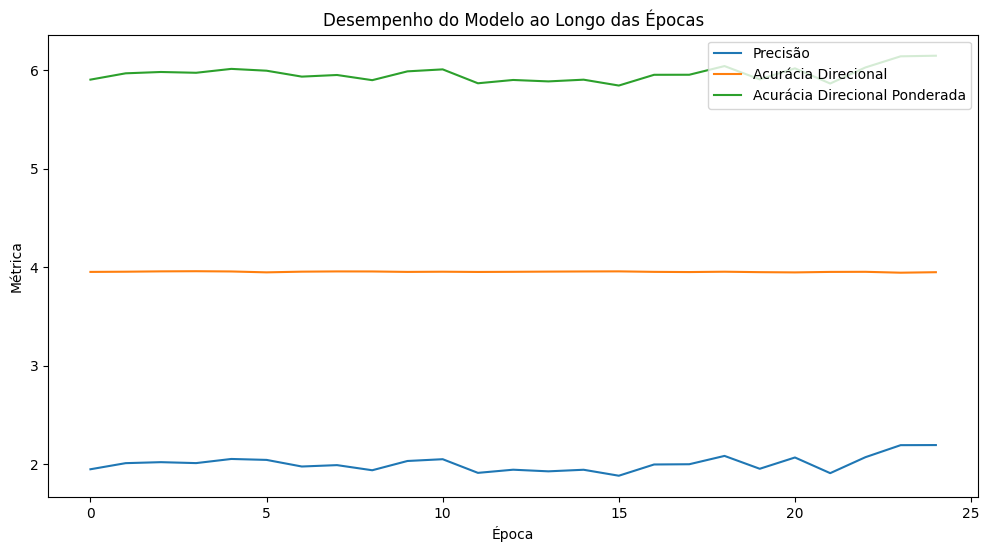

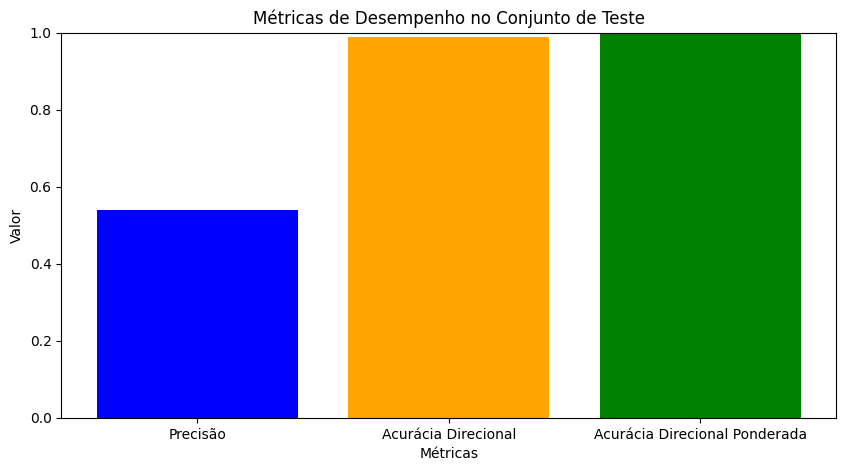

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from collections import deque
import random
import matplotlib.pyplot as plt


class DQNAgent:
    def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon, buffer_size=10000):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.memory = deque(maxlen=buffer_size)

        # Crie a rede neural
        self.model = self.build_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss='sparse_categorical_crossentropy')

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(self.n_actions, activation='softmax')
        ])
        return model

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            q_values = self.model.predict(state.reshape(1, -1), batch_size=1, verbose=0)
            return np.argmax(q_values)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1), batch_size=1, verbose=0)))
            target_f = self.model.predict(state.reshape(1, -1), batch_size=1, verbose=0)
            target_f[0][action] = target
            self.model.fit(state.reshape(1, -1), np.array([action]), epochs=1, verbose=0)

    def update_epsilon(self, decay_rate, min_epsilon):
        if self.epsilon > min_epsilon:
            self.epsilon *= decay_rate


def calculate_reward(action, acerto):
    # Recompensa base
    reward = 0
    if action == 1:  # Apostou
        if acerto == 1:
            reward = 10  # Recompensa por apostar corretamente
        elif acerto == 2:
            reward = -5  # Penalidade por apostar incorretamente
    return reward


def normalize_data(features):
    scaler = StandardScaler()
    return scaler.fit_transform(features)


def main():
    # Carregar os dados
    #data = pd.read_csv('/home/darkcover/Documentos/Out/dados/data_final.csv')

    # Selecionar as features e a variável de saída
    features = data[['odd_entrada', 'media5', 'media10', 'media20', 'media40', 'media80', 'media160', 'media320', 'media640', 'acerto', 'level', 'contagem']].values
    rewards = data['apostar'].values  # Variável de saída: se deve apostar ou não

    features = normalize_data(features)

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Parâmetros de treinamento
    n_epochs = 25  # Número de épocas de treinamento
    batch_size = 64  # Tamanho do lote para treinamento

    # Crie o agente DQN
    n_states = X_train.shape[1]
    n_actions = 2  # Ações possíveis: apostar ou não apostar
    dqn_agent = DQNAgent(n_states, n_actions, learning_rate=0.001, gamma=0.99, epsilon=1.0, buffer_size=10000)

    epoch_accuracies = []
    epoch_directional_accuracies = []
    epoch_weighted_directional_accuracies = []

    # Treinamento do agente
    for epoch in range(n_epochs):
        correct_predictions = 0
        overestimations = 0
        weighted_correct_predictions = 0
        weighted_overestimations = 0

        for i in range(len(X_train) - 1):
            state = X_train[i, :]
            action = dqn_agent.get_action(state)
            true_action = y_train[i]
            acerto = state[-3]  # Última coluna relevante para o cálculo da recompensa
            reward = calculate_reward(action, acerto)
            next_state = X_train[i + 1, :]
            done = (i == len(X_train) - 2)

            dqn_agent.remember(state, action, reward, next_state, done)

            if done:
                dqn_agent.replay(batch_size)
                dqn_agent.update_epsilon(0.995, 0.01)

            if action == true_action:
                correct_predictions += 1
                weighted_correct_predictions += 2  # Peso maior para acertos exatos
            elif action > true_action:
                overestimations += 1
                weighted_overestimations += 1  # Peso menor para erros

        epoch_accuracy = correct_predictions / len(X_test)
        epoch_directional_accuracy = (correct_predictions + overestimations) / len(X_test)
        epoch_weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

        epoch_accuracies.append(epoch_accuracy)
        epoch_directional_accuracies.append(epoch_directional_accuracy)
        epoch_weighted_directional_accuracies.append(epoch_weighted_directional_accuracy)

    # Teste o agente
    correct_predictions = 0
    overestimations = 0
    weighted_correct_predictions = 0
    weighted_overestimations = 0

    predicted_actions = []

    for i in range(len(X_test)):
        state = X_test[i, :]
        action = dqn_agent.get_action(state)
        true_action = y_test[i]

        predicted_actions.append(action)

        if action == true_action:
            correct_predictions += 1
            weighted_correct_predictions += 2
        elif action > true_action:
            overestimations += 1
            weighted_overestimations += 1

    accuracy = correct_predictions / len(X_test)
    directional_accuracy = (correct_predictions + overestimations) / len(X_test)
    weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

    print("Precisão:", accuracy)
    print("Acurácia Direcional:", directional_accuracy)
    print("Acurácia Direcional Ponderada:", weighted_directional_accuracy)

    plt.figure(figsize=(12, 6))
    plt.plot(epoch_accuracies, label='Precisão')
    plt.plot(epoch_directional_accuracies, label='Acurácia Direcional')
    plt.plot(epoch_weighted_directional_accuracies, label='Acurácia Direcional Ponderada')
    plt.xlabel('Época')
    plt.ylabel('Métrica')
    plt.title('Desempenho do Modelo ao Longo das Épocas')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    metrics = [accuracy, directional_accuracy, weighted_directional_accuracy]
    metric_labels = ['Precisão', 'Acurácia Direcional', 'Acurácia Direcional Ponderada']
    colors = ['blue', 'orange', 'green']
    plt.bar(metric_labels, metrics, color=colors)
    plt.xlabel('Métricas')
    plt.ylabel('Valor')
    plt.title('Métricas de Desempenho no Conjunto de Teste')
    plt.ylim(0, 1)
    plt.show()

    dqn_agent.model.save('AgenteAposta.h5')
    data_save = pd.DataFrame({'epoch_accuracies': epoch_accuracies,
                              'epoch_directional_accuracies': epoch_directional_accuracies,
                              'epoch_weighted_directional_accuracies': epoch_weighted_directional_accuracies})
    data_save.to_csv('/content/drive/MyDrive/Out/dados/metricas_aposta.csv', index=False)

if __name__ == '__main__':
    main()
